In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers
from keras.models import Sequential

In [3]:
# Charger les données
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# Classes
Class_cifar10 = ['Avion', 'Automobile','Oiseau','Chat','Cerf','Chien','Grenouille','Cheval','Bateau','Camion']

In [5]:
# Formes des ensembles d'entrainement et de test
print(f"Ensemble d'entrainement (Image) : {X_train.shape}")
print(f"Ensemble d'entrainement (Étiquette) : {y_train.shape}")
print(f"Ensemble de test (Image) : {X_test.shape}")
print(f"Ensemble de test (Étiquette) : {y_test.shape}")

Ensemble d'entrainement (Image) : (50000, 32, 32, 3)
Ensemble d'entrainement (Étiquette) : (50000, 1)
Ensemble de test (Image) : (10000, 32, 32, 3)
Ensemble de test (Étiquette) : (10000, 1)


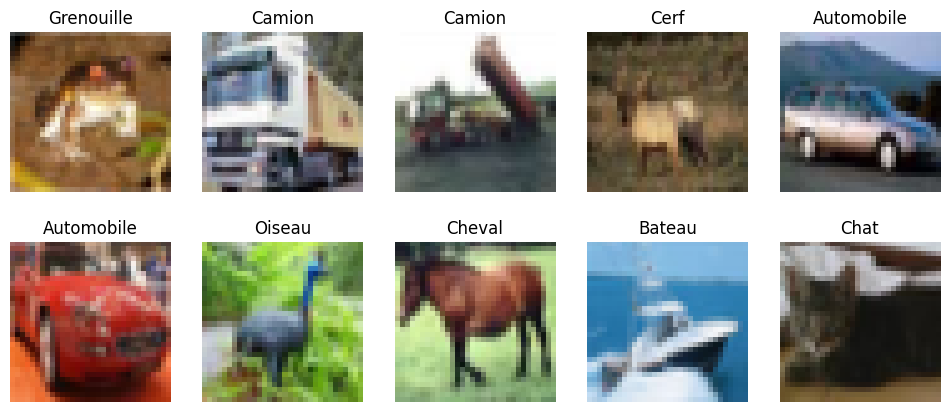

In [6]:
# Visualisation de quelques images

plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(X_train[i])
    plt.title(Class_cifar10[y_train[i][0]])
    plt.axis('off')
plt.show()

In [7]:
# Distribution
Distribution_Class = [0]*10
for label in y_train:
    Distribution_Class[label[0]] += 1

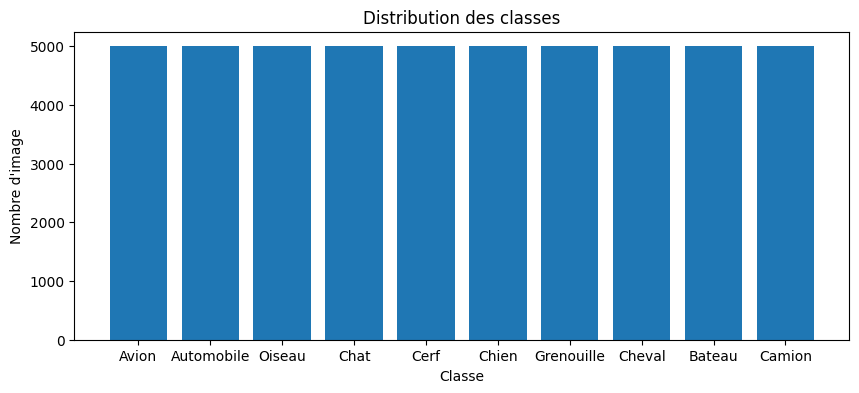

In [8]:
plt.figure(figsize=(10,4))
plt.bar(Class_cifar10, Distribution_Class)
plt.title('Distribution des classes')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'image')
plt.show()

In [9]:
# Prétraitement des données

    # Normalisation
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [10]:
    # One-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [11]:
    # Dimension après prétraitement
print(f"Ensemble d'entrainement (Image) : {X_train.shape}")
print(f"Ensemble d'entrainement (Étiquette) : {y_train.shape}")
print(f"Ensemble de test (Image) : {X_test.shape}")
print(f"Ensemble de test (Étiquette) : {y_test.shape}")

Ensemble d'entrainement (Image) : (50000, 32, 32, 3)
Ensemble d'entrainement (Étiquette) : (50000, 10)
Ensemble de test (Image) : (10000, 32, 32, 3)
Ensemble de test (Étiquette) : (10000, 10)


In [12]:
# Construction du modèle

    # Modèle MLP
mpl_model = Sequential([
    layers.Input(shape=(32,32,3)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
mpl_model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
mpl_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
historique = mpl_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
test_loss, test_accuracy = mpl_model.evaluate(X_test, y_test, verbose=2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2640 - loss: 2.0628 - val_accuracy: 0.3516 - val_loss: 1.8164
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3734 - loss: 1.7734 - val_accuracy: 0.3781 - val_loss: 1.7557
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3939 - loss: 1.7031 - val_accuracy: 0.3830 - val_loss: 1.7356
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4109 - loss: 1.6556 - val_accuracy: 0.3964 - val_loss: 1.6850
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4195 - loss: 1.6294 - val_accuracy: 0.4040 - val_loss: 1.6813
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4279 - loss: 1.6037 - val_accuracy: 0.4270 - val_loss: 1.6231
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4285 - loss: 1.6044 - val_accuracy: 0.4156 - val_loss: 1.6686
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4406 - loss: 1.5742 - val_accuracy: 0.

In [16]:
print(test_accuracy)
print(test_loss)

0.4478999972343445
1.5671238899230957


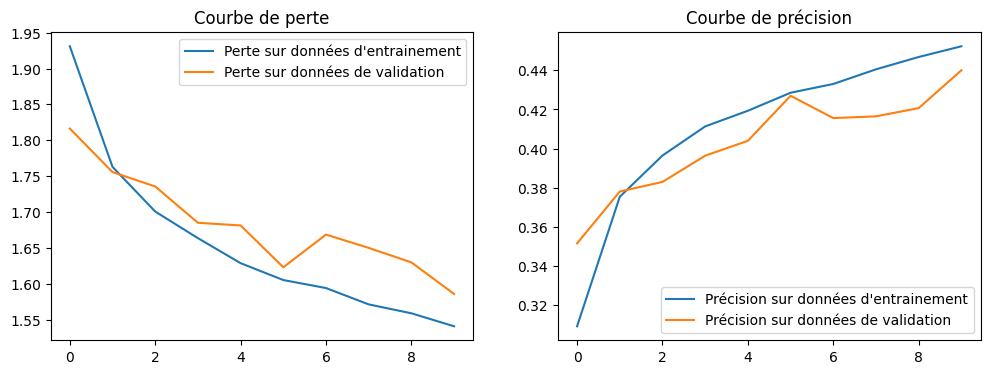

In [17]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(historique.history['loss'], label= "Perte sur données d'entrainement")
plt.plot(historique.history['val_loss'], label= "Perte sur données de validation")
plt.legend()
plt.title("Courbe de perte")

plt.subplot(1,2,2)
plt.plot(historique.history['accuracy'], label="Précision sur données d'entrainement")
plt.plot(historique.history['val_accuracy'], label= "Précision sur données de validation")
plt.legend()
plt.title("Courbe de précision")

plt.show()

In [18]:
print(f"Précision sur les données de test : {test_accuracy*100:.2f}%")

Précision sur les données de test : 44.79%


In [19]:
CLASSES = np.array(Class_cifar10).reshape(10, 1)
print("Classes : ", CLASSES)

Classes :  [['Avion']
 ['Automobile']
 ['Oiseau']
 ['Chat']
 ['Cerf']
 ['Chien']
 ['Grenouille']
 ['Cheval']
 ['Bateau']
 ['Camion']]


In [20]:
predictions = mpl_model.predict(X_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=1)]
vrais_labels = CLASSES[np.argmax(y_test, axis=1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
Nbre_img = 5
indices = np.random.choice(range(len(X_test)), Nbre_img, replace=False)

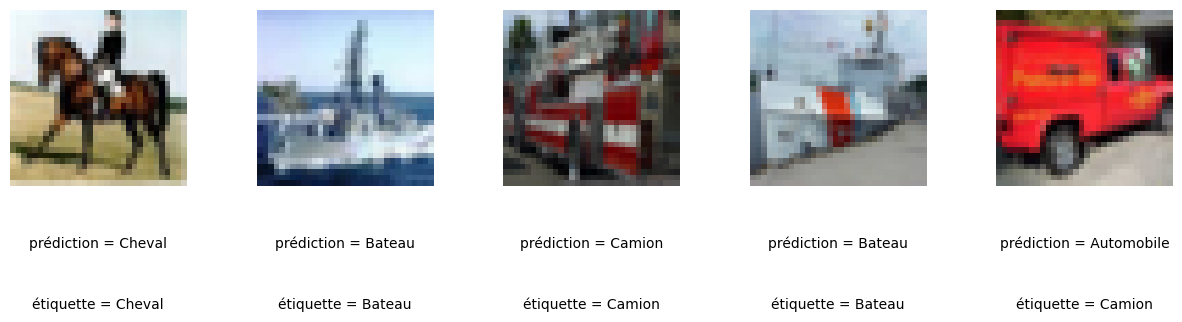

In [22]:
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    image = X_test[idx]
    ax = fig.add_subplot(1, Nbre_img, i + 1)
    ax.axis("off")
    ax.text(0.5, -0.35, f"prédiction = {predictions_simples[idx][0]}", fontsize = 10 , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, f"étiquette = {vrais_labels[idx][0]}", fontsize = 10 , ha='center', transform=ax.transAxes)
    ax.imshow(image)

plt.show()


In [25]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [27]:
CNN_model = Sequential([
    Conv2D(32, (3,3), activation ='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [28]:
CNN_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
CNN_history = CNN_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.2952 - loss: 1.9139 - val_accuracy: 0.5118 - val_loss: 1.3771
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4737 - loss: 1.4530 - val_accuracy: 0.5562 - val_loss: 1.2520
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5264 - loss: 1.3215 - val_accuracy: 0.5907 - val_loss: 1.1587
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5716 - loss: 1.2002 - val_accuracy: 0.6127 - val_loss: 1.0865
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6014 - loss: 1.1362 - val_accuracy: 0.6353 - val_loss: 1.0437
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6131 - loss: 1.0930 - val_accuracy: 0.6485 - val_loss: 1.0012
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6351 - loss: 1.0333 - val_accuracy: 0.6642 - val_loss: 0.9683
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6583 - loss: 0.9804 - val_a

In [30]:
test_loss, test_accuracy = CNN_model.evaluate(X_test, y_test, verbose=2)

313/313 - 2s - 5ms/step - accuracy: 0.6780 - loss: 0.9284


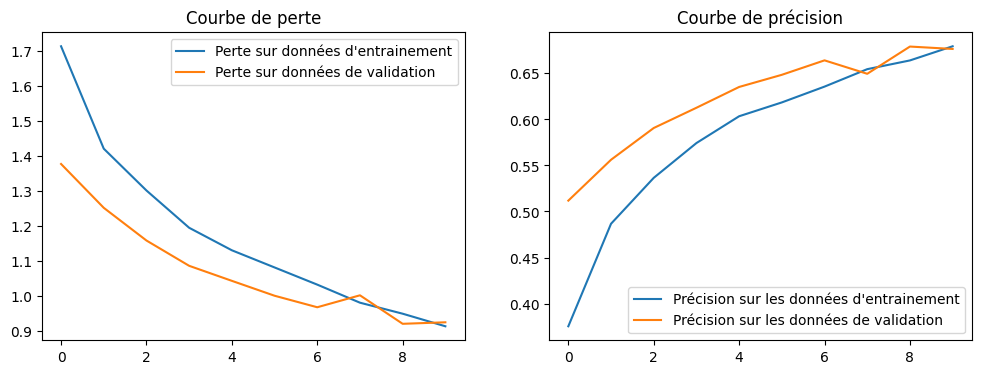

In [31]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(CNN_history.history['loss'], label="Perte sur données d'entrainement")
plt.plot(CNN_history.history['val_loss'], label="Perte sur données de validation")
plt.legend()
plt.title("Courbe de perte")

plt.subplot(1,2,2)
plt.plot(CNN_history.history['accuracy'], label="Précision sur les données d'entrainement")
plt.plot(CNN_history.history['val_accuracy'], label="Précision sur les données de validation")
plt.legend()
plt.title("Courbe de précision")

plt.show()

In [49]:
Nbre_img = 5
indices = np.random.choice(range(len(X_test)), Nbre_img, replace=False)

In [36]:
predictions = CNN_model.predict(X_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=1)]
vrais_labels = CLASSES[np.argmax(y_test, axis=1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


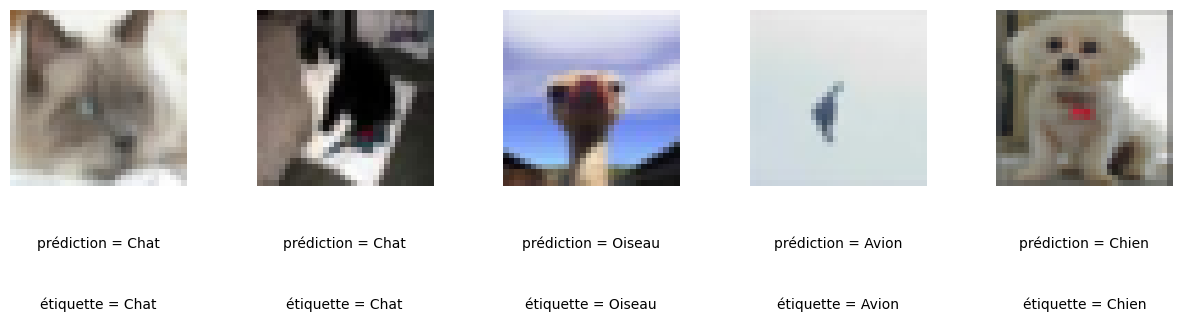

In [37]:
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    image = X_test[idx]
    ax = fig.add_subplot(1, Nbre_img, i+1)
    ax.axis("off")
    ax.text(0.5, -0.35, f"prédiction = {predictions_simples[idx][0]}", fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, f"étiquette = {vrais_labels[idx][0]}", fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(image)

plt.show()

In [38]:
from keras.layers import BatchNormalization, LeakyReLU

In [40]:
update_CNN_model = Sequential([
    # Couche de convolution 1 avec normalisation et activation
    Conv2D(32, (3,3), strides=1, padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    LeakyReLU(),
    # Couche de convolution 2 
    Conv2D(32, (3,3), strides=2, padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    # Couche de convolution 3
    Conv2D(64, (3,3), strides=1, padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    # Couche de convolution 4
    Conv2D(64, (3,3), strides=2,padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    # Aplatir les données
    Flatten(),
    # couche dense 1
    Dense(128),
    BatchNormalization(),
    LeakyReLU(),
    # Couche de dropout
    Dropout(0.5),
    # Couche de sortie
    Dense(10, activation='softmax')
])

In [41]:
update_CNN_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)

In [42]:
update_CNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
update_CNN_model_history = update_CNN_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.3764 - loss: 1.8443 - val_accuracy: 0.4931 - val_loss: 1.4108
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.5644 - loss: 1.2180 - val_accuracy: 0.5881 - val_loss: 1.1351
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6335 - loss: 1.0350 - val_accuracy: 0.6472 - val_loss: 0.9862
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6750 - loss: 0.9305 - val_accuracy: 0.6070 - val_loss: 1.1322
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.7052 - loss: 0.8497 - val_accuracy: 0.6726 - val_loss: 0.9329
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.7218 - loss: 0.7970 - val_accuracy: 0.6960 - val_loss: 0.8690
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7387 - loss: 0.7432 - val_accuracy: 0.6953 - val_loss: 0.8774
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.7562 - loss: 0.6967 - 

In [44]:
test_loss, test_accuracy = update_CNN_model.evaluate(X_test, y_test, verbose=2)

313/313 - 2s - 6ms/step - accuracy: 0.6892 - loss: 0.9351


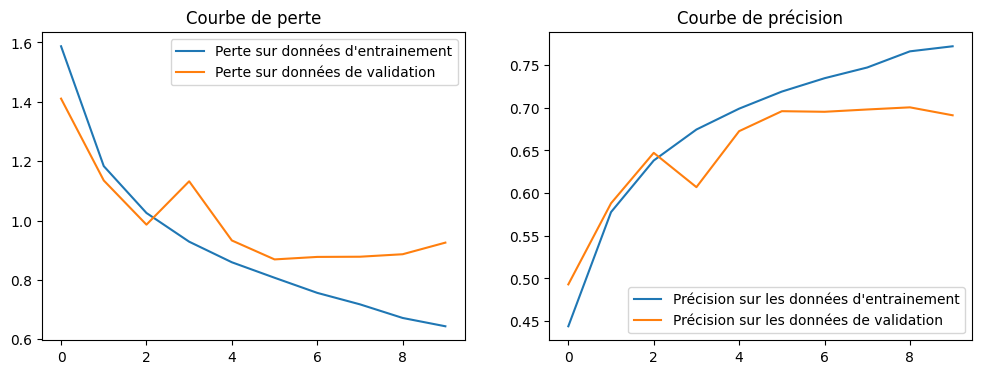

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(update_CNN_model_history.history['loss'], label="Perte sur données d'entrainement")
plt.plot(update_CNN_model_history.history['val_loss'], label="Perte sur données de validation")
plt.legend()
plt.title("Courbe de perte")

plt.subplot(1,2,2)
plt.plot(update_CNN_model_history.history['accuracy'], label="Précision sur les données d'entrainement")
plt.plot(update_CNN_model_history.history['val_accuracy'], label="Précision sur les données de validation")
plt.legend()
plt.title("Courbe de précision")

plt.show()

In [50]:
predictions = update_CNN_model.predict(X_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=1)]
vrais_labels = CLASSES[np.argmax(y_test, axis=1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


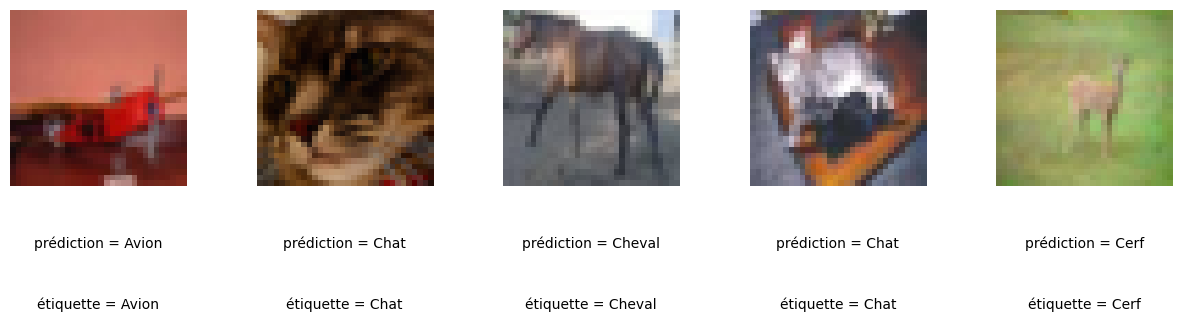

In [51]:
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    image = X_test[idx]
    ax = fig.add_subplot(1, Nbre_img, i+1)
    ax.axis("off")
    ax.text(0.5, -0.35, f"prédiction = {predictions_simples[idx][0]}", fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, f"étiquette = {vrais_labels[idx][0]}", fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(image)

plt.show()

In [52]:
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16

In [53]:
model_VGG16 = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [54]:
x= model_VGG16.output
x= GlobalAveragePooling2D()(x)
x= Dense(512, activation='relu')(x)
x= Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

In [55]:
transfert_learning_model = keras.Model(inputs=model_VGG16.input, outputs = predictions)

for layer in model_VGG16.layers:
    layer.trainable = False

transfert_learning_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
historique_transfert = transfert_learning_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, shuffle=True)

test_loss, test_accuracy = transfert_learning_model.evaluate(X_test, y_test, verbose=2)
print(f"Précision sur les données de test : {test_accuracy*100:.2f}%")

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 179ms/step - accuracy: 0.4109 - loss: 1.6671 - val_accuracy: 0.5563 - val_loss: 1.2568
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 207ms/step - accuracy: 0.5457 - loss: 1.2896 - val_accuracy: 0.5742 - val_loss: 1.2088
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 172ms/step - accuracy: 0.5747 - loss: 1.2074 - val_accuracy: 0.5926 - val_loss: 1.1688
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.5859 - loss: 1.1819 - val_accuracy: 0.5919 - val_loss: 1.1636
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 204ms/step - accuracy: 0.6000 - loss: 1.1358 - val_accuracy: 0.6073 - val_loss: 1.1306
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 207ms/step - accuracy: 0.6095 - loss: 1.1139 - val_accuracy: 0.6160 - val_loss: 1.1180
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 207ms/step - accuracy: 0.6147 - loss: 1.0878 - val_accuracy: 0.6095 - val_loss: 1.1252
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 208ms/step - accuracy: 0.6282 -

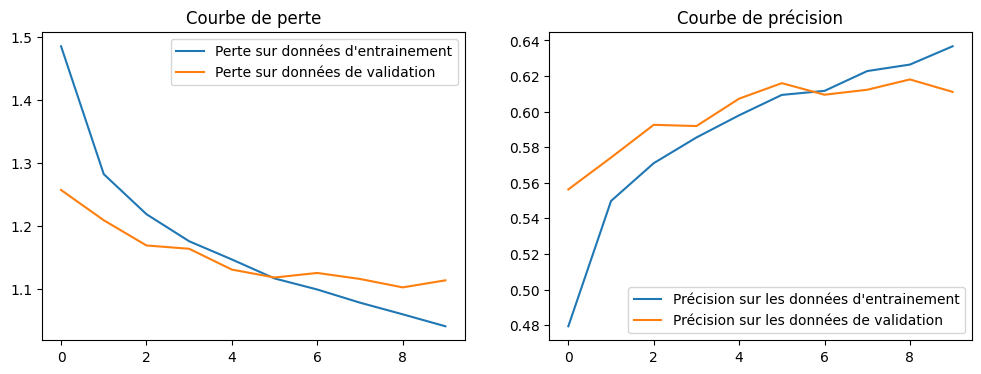

In [57]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(historique_transfert.history['loss'], label="Perte sur données d'entrainement")
plt.plot(historique_transfert.history['val_loss'], label="Perte sur données de validation")
plt.legend()
plt.title("Courbe de perte")

plt.subplot(1,2,2)
plt.plot(historique_transfert.history['accuracy'], label="Précision sur les données d'entrainement")
plt.plot(historique_transfert.history['val_accuracy'], label="Précision sur les données de validation")
plt.legend()
plt.title("Courbe de précision")

plt.show()